In [1]:
import numpy as np
# import tensorflow as tf
import matplotlib.pyplot as plt

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


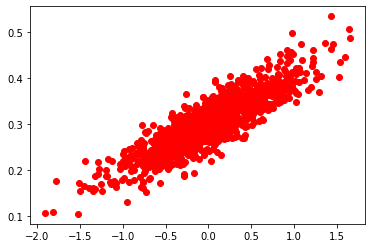

In [2]:
# 随机生成1000个点，围绕在y=0.1x+0.3的直线周围
num_points = 1000
vectors_set = []
for i in range(num_points):
    x1 = np.random.normal(0.0, 0.55)
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1, y1])

# 生成一些样本
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

plt.scatter(x_data,y_data,c='r')
plt.show()

In [3]:
# 生成1维的W矩阵，取值是[-1,1]之间的随机数
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='W')
# 生成1维的b矩阵，初始值是0
b = tf.Variable(tf.zeros([1]), name='b')
# 经过计算得出预估值y
y = W * x_data + b

# 以预估值y和实际值y_data之间的均方误差作为损失
loss = tf.reduce_mean(tf.square(y - y_data), name='loss')
# 采用梯度下降法来优化参数
optimizer = tf.train.GradientDescentOptimizer(0.5)
# 训练的过程就是最小化这个误差值
train = optimizer.minimize(loss, name='train')

sess = tf.Session()

init = tf.global_variables_initializer()
sess.run(init)

# 初始化的W和b是多少
print ("W =", sess.run(W), "b =", sess.run(b), "loss =", sess.run(loss))
# 执行20次训练
for step in range(20):
    sess.run(train)
    # 输出训练好的W和b
    print ("W =", sess.run(W), "b =", sess.run(b), "loss =", sess.run(loss))
#writer = tf.train.SummaryWriter("./tmp", sess.graph)

W = [0.52365017] b = [0.] loss = 0.14499275
W = [0.39650673] b = [0.2992335] loss = 0.027671795
W = [0.3065054] b = [0.2998075] loss = 0.013922895
W = [0.24374971] b = [0.30021384] loss = 0.00723827
W = [0.19999167] b = [0.3004972] loss = 0.0039882483
W = [0.16948025] b = [0.30069476] loss = 0.0024081077
W = [0.14820537] b = [0.3008325] loss = 0.0016398536
W = [0.1333709] b = [0.30092856] loss = 0.0012663334
W = [0.12302719] b = [0.30099553] loss = 0.00108473
W = [0.11581477] b = [0.30104226] loss = 0.0009964358
W = [0.11078572] b = [0.3010748] loss = 0.00095350767
W = [0.10727909] b = [0.3010975] loss = 0.00093263626
W = [0.10483401] b = [0.30111334] loss = 0.0009224888
W = [0.1031291] b = [0.3011244] loss = 0.00091755507
W = [0.10194032] b = [0.30113208] loss = 0.00091515644
W = [0.1011114] b = [0.30113745] loss = 0.0009139902
W = [0.10053343] b = [0.3011412] loss = 0.00091342314
W = [0.10013041] b = [0.3011438] loss = 0.00091314747
W = [0.0998494] b = [0.3011456] loss = 0.0009130135

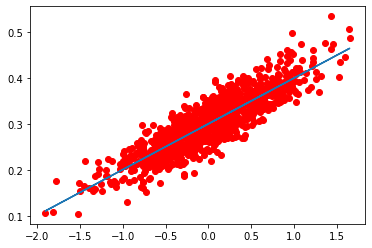

In [4]:
plt.scatter(x_data,y_data,c='r')
plt.plot(x_data,sess.run(W)*x_data+sess.run(b))
plt.show()